### Data visualization

Computing the correlation

In [197]:
# preparing the datasets
%run scripts/graphs.py

data_regions = pd.read_csv('data/rain_data.csv', index_col=0)
data_tw = pd.read_csv('data/tweet_df_class.csv', index_col=0)
data = data_regions.sum(axis=1)

data.index = pd.to_datetime(data.index)
data_tw = data_tw.set_index('Datetime')
data_tw.index = pd.to_datetime(data_tw.index).date.astype('datetime64')

In [198]:
#making timeseries
tweets = data_tw['class'].truncate(before='2022-03-29')
tweets.name ='malaria instances'
rain = data
rain.name = 'rainfall'

#changing period
tweets_weekly = tweets.resample('W').sum()
rain_weekly = rain.resample('W').mean()
tweets_monthly = tweets.resample('M').sum()[1:]
rain_monthly = rain.resample('M').mean()[1:]

#lagging rainfalls
rain_weekly_1 = rain_weekly.shift(1).truncate(before='2022-04-03').rename('rainfall+1')
rain_weekly_2 = rain_weekly.shift(2).dropna().rename('rainfall+2')

#create a single dataset and check the correlations
months = pd.concat([tweets_monthly, rain_monthly], join='inner', axis=1)
week = pd.concat([tweets_weekly, rain_weekly, rain_weekly_1, rain_weekly_2], join='inner', axis=1)
pd.options.display.float_format = '{:,.2f}'.format
print(week.corr().iloc[:, 0].rename('pearson correlation with malaria instances'), '\n\n')
print(week.corr(method='spearman').iloc[:, 0].rename('spearman correlation with malaria instances'))

malaria instances   1.00
rainfall            0.48
rainfall+1          0.47
rainfall+2          0.34
Name: pearson correlation with malaria instances, dtype: float64 


malaria instances   1.00
rainfall            0.39
rainfall+1          0.47
rainfall+2          0.36
Name: spearman correlation with malaria instances, dtype: float64


Creating barplots

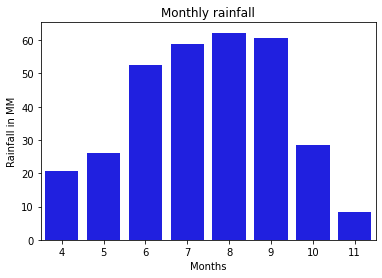

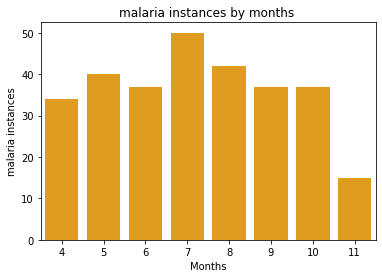

In [199]:
# create the bar plot
barplots(rain_monthly.index.month[:-1],rain_monthly.values[:-1],rain_monthly,'blue','Months','Rainfall in MM','Monthly rainfall')
barplots(tweets_monthly.index.month,tweets_monthly.values,tweets_monthly,'orange','Months','malaria instances','malaria instances by months ')

Creating lineplots

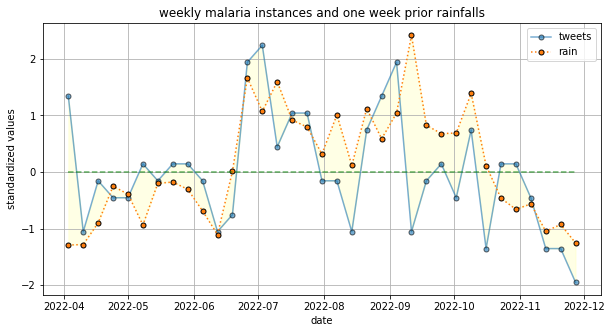

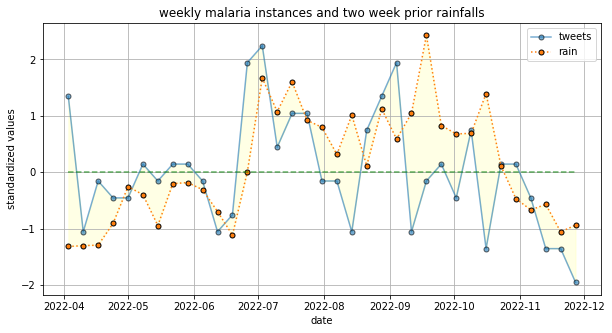

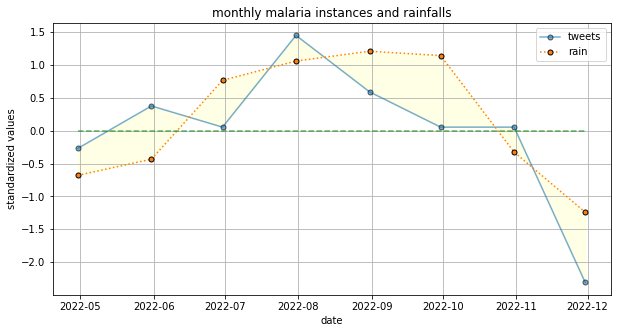

In [200]:
lineplots(zscore(tweets_weekly), zscore(rain_weekly_1), 
        title_='weekly malaria instances and one week prior rainfalls', y_label='standardized values')
lineplots(zscore(tweets_weekly), zscore(rain_weekly_2), 
        title_='weekly malaria instances and two week prior rainfalls', y_label='standardized values')
lineplots(zscore(tweets_monthly), zscore(rain_monthly), 
        title_='monthly malaria instances and rainfalls', y_label='standardized values')

Creating the doublebar plot

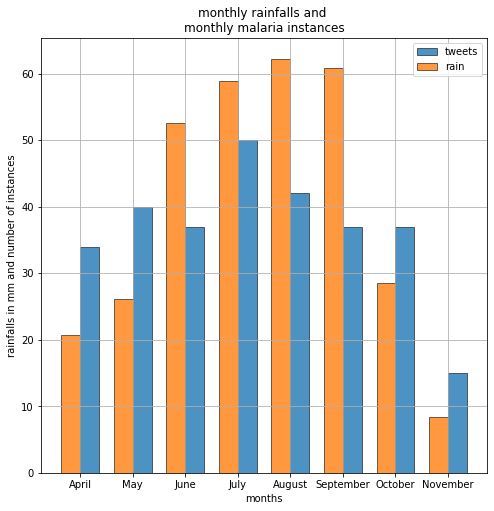

In [201]:
fig, axs = plt.subplots(figsize=(8, 8))

x = np.arange(len(months))
axs.bar(x+0.18, months['malaria instances'].values, width=0.36, edgecolor='black', 
        linewidth=0.7, label='tweets', alpha=0.8)
axs.bar(x-0.18, months['rainfall'].values, width=0.36, edgecolor='black', 
        linewidth=0.7, label='rain', alpha=0.8)
axs.grid()
axs.legend()
axs.set(title='monthly rainfalls and \nmonthly malaria instances', 
        xlabel='months', ylabel='rainfalls in mm and number of instances',
        xticks=x, xticklabels=month_name[4:12])
plt.show()